/tmp/ipython-input-330498954.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  optimizationPathGD[0, epoch] = params[0]
/tmp/ipython-input-330498954.py:74: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  optimizationPathGD[1, epoch] = params[1]
/tmp/ipython-input-330498954.py:16: RuntimeWarning: overflow encountered in square
  f = lambda x1, x2: 100 * (x2 - x1**2) ** 2 + (1 - x1) ** 2
/tmp/ipython-input-330498954.py:18: RuntimeWarning: overflow encountered in square
  np.array(400 * (-x2 + x1**2) * x1 + 2 * (x1 - 1)),
/tmp/ipython-input-330498954.py:19: RuntimeWarning: overflow encountered in square
  np.array(200 * (x2 - x1**2)),
/tmp/

Epoch: 0/1000		Cost = 1.44e+04
Epoch: 100/1000		Cost = nan
Epoch: 200/1000		Cost = nan
Epoch: 300/1000		Cost = nan
Epoch: 400/1000		Cost = nan
Epoch: 500/1000		Cost = nan
Epoch: 600/1000		Cost = nan
Epoch: 700/1000		Cost = nan
Epoch: 800/1000		Cost = nan
Epoch: 900/1000		Cost = nan
Epoch: 0/1000		Cost = 1.44e+04
Epoch: 100/1000		Cost = 4.11e-01
Epoch: 200/1000		Cost = 3.22e-01
Epoch: 300/1000		Cost = 3.06e-01
Epoch: 400/1000		Cost = 2.88e-01
Epoch: 500/1000		Cost = 2.68e-01
Epoch: 600/1000		Cost = 2.46e-01
Epoch: 700/1000		Cost = 2.23e-01
Epoch: 800/1000		Cost = 2.00e-01
Epoch: 900/1000		Cost = 1.78e-01


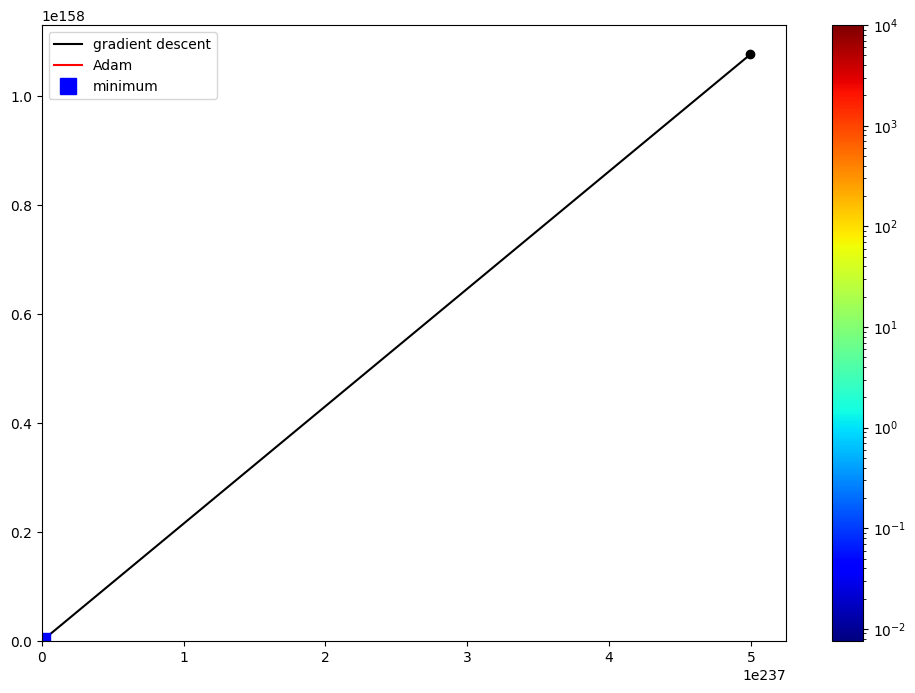

In [24]:
# Exercise 06, Adam

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import copy

np.random.seed(100)
# Criação dos dados e .seed é o comando para que sejam armazenados (A fim de evitar novos dados toda vez que rodar o código)
x1 = 4.0
x2 = 4.0
params0 = [np.array([x1]), np.array([x2])]
# o valor de x1 e x2 foram colocados entre parenteses para dar como resposta um vetor

# print(params0) # Estava avaliando a direfença com e sem parenteses na resposta
f = lambda x1, x2: 100 * (x2 - x1**2) ** 2 + (1 - x1) ** 2
dfdx = lambda x1, x2: [
    np.array(400 * (-x2 + x1**2) * x1 + 2 * (x1 - 1)),
    np.array(200 * (x2 - x1**2)),
]

# Adam optimizer

class AdamOptimizer:
# Class é o comando para definiar uma N.N
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None # list to store all first statistical moments
        self.n = None # list to store all second statistical moments
        self.t = 0 # É uma forma de saber quantas épocas foram realizadas.

    def updateParams(self, params, grads):
        if self.m is None:
          self.m = [np.zeros_like(param) for param in params]
        if self.n is None:
          self.n = [np.zeros_like(param) for param in params]
# Essa parte do código é para garantir que rode logo no começo, pois m e n não possuem valores definidos ainda.
        updatedParams = []
# = [] é a criação de uma lista vazia, mas será preenchida conforme a necessidade do programa
        self.t += 1 # É o contador de epocas.

        for p, g, m, n in zip(params, grads, self.m, self.n):
# zip () agrupa elementos correspondentes em multiplas coleções, retornando um etirador que gera tuplas (É um dado que uma vez criado, não poderá mais ser alterado)
            m[:] = self.beta1 * m + (1 - self.beta1) * g
# [:] significa que estamos utilizando e alterando todos os valores da lista.
            n[:] = self.beta2 * n + (1 - self.beta2) * (g**2)

            mhat = m / (1 - self.beta1**self.t)
            nhat = n / (1 - self.beta2**self.t)

            updatedP = p - self.lr * mhat / (np.sqrt(nhat) + self.epsilon)
            updatedParams.append(updatedP)

        return updatedParams


# optimization with gradient descent

lr = 1e-3
epochs = 1000

params = copy.deepcopy(params0)
# copy.deepcopy copia completamente e independentemente do objeto, incluindo todos os objetos aninhados a ela. É uma forma de manter o original.

optimizationPathGD = np.zeros((2, epochs))
for epoch in range(epochs):
    cost = f(params[0], params[1]).item()
# .item() é um comando para gerar apenas um valor.

    optimizationPathGD[0, epoch] = params[0]
    optimizationPathGD[1, epoch] = params[1]
# o valor entre parentêses faz referencia a qual elemento, lembrando que params copiou de params0, que por sua ver é um array com 2 elementos
    grad = dfdx(params[0], params[1])

    params[0] -= lr * grad[0]
    params[1] -= lr * grad[1]

    if epoch % 100 == 0:
# Se a época for divisivel por 100 ela roda as linhas abaixo
        string = "Epoch: {}/{}\t\tCost = {:.2e}"
# = {:.2e} significa: {:.2} = 2 casas decimais e "e" significa notação científica
        print(string.format(epoch, epochs, cost))

# optimization with Adam

lr = 5e-1
epochs = 1000
optimizer = AdamOptimizer(lr=lr)

params = copy.deepcopy(params0)

optimizationPathAdam = np.zeros((2, epochs))
for epoch in range(epochs):
    cost = f(params[0], params[1]).item()
    optimizationPathAdam[0, epoch] = params[0]
    optimizationPathAdam[1, epoch] = params[1]
    grad = dfdx(params[0], params[1])

    params = optimizer.updateParams(params, grad)

    if epoch % 100 == 0:
        string = "Epoch: {}/{}\t\tCost = {:.2e}"
        print(string.format(epoch, epochs, cost))


# visualize the optimization path

x1_ = np.linspace(-1, 3, 200)
x2_ = np.linspace(-1, 3, 200)
x1_, x2_ = np.meshgrid(x1_, x2_, indexing="ij")

# np.meshgrid é comando que recebe vetores 1D e volta matrizes 2D que representam todas as combinações possíveis, além de possuir o parâmetro indexing que ajuda a organizar o x1 varia nas linhas e x2 varia nas colunas

fig, ax = plt.subplots(figsize=(12,8))
cp = ax.pcolormesh(x1_, x2_, f(x1_, x2_), cmap=plt.cm.jet, norm=colors.LogNorm(), shading='auto')
ax.plot(optimizationPathGD[0], optimizationPathGD[1], 'k', label="gradient descent")
ax.plot(optimizationPathGD[0], optimizationPathGD[1], 'ko')
ax.plot(optimizationPathAdam[0], optimizationPathAdam[1], "r", label="Adam")
ax.plot(optimizationPathAdam[0], optimizationPathAdam[1], "rs")
ax.plot([1], [1], "bs", markersize=12, label="minimum")

fig.colorbar(cp)
ax.legend()
plt.show()

# Não consegui visualizar a curva do Adam, tentei alterar o número de épocas, cor da linha e também o coeficiente de aprendizagem, mas sem resolver
